In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
plt.style.use('science')
import pandas as pd
from IPython.display import display, Math
from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
c = const.c.cgs.value
amu = const.u.cgs.value
k_B = const.k_B.cgs.value
hplanck = const.h.cgs.value

In [23]:
Fe_mass = 55.85
Mg_mass = 24.31
Na_mass = 22.98977
Ne_mass = 20.179
O_mass = 15.9994
N_mass = 14.0067
Ar_mass = 39.948
Mn_mass = 54.938
Si_mass = 28.0855
S_mass = 32.065
Cr_mass = 51.9961

In [42]:
line_id_latex = [r"Fe \textsc{xi} 680",r"Fe \textsc{xi} 1028",r"Na \textsc{ix}",r"Fe \textsc{viii} 697",r"Mg \textsc{ix}",r"Mg \textsc{viii} 782",
           r"Mg \textsc{viii} 762",r"Ne \textsc{viii}",r"O \textsc{vi}",r"Mg \textsc{x}",r"N \textsc{v}",r"Ar \textsc{viii}"]

line_id = ["Fe XI 680","Fe XI 1028","Na IX","Fe VIII","Mg IX","Mg VIII 782","Mg VIII 772","Ne VIII","O VI","Mg X","N V","Ar VIII"]
line_width = np.array([232.595,248.501,216.424,182.978,214.584,212.908,206.79,218.372,250.393,167.543,282.434,185.251])/1.0e3
line_wvl = np.array([680.4266965,1028.990667,681.7591379,697.154969,749.5248989,782.4185872,772.3031131,
                    770.4240727,1031.911544,624.951949,1238.815838,713.7827419])
line_mass = np.array([Fe_mass,Fe_mass,Na_mass,Fe_mass,Mg_mass,Mg_mass,Mg_mass,Ne_mass,O_mass,Mg_mass,N_mass,Ar_mass])
line_z2a = np.array([10.0,10.0,8.0,7.0,8.0,7.0,7.0,7.0,5.0,9.0,4.0,7])/line_mass 

In [43]:
eis_id_latex = [r"Fe \textsc{viii} 185",r"Fe \textsc{viii} 186",r"Fe \textsc{ix} 188",r"Fe \textsc{x} 184",r"Fe \textsc{xi} 188",
                r"Fe \textsc{xii} 195",r"O \textsc{vi}",r"Mn \textsc{viii}",r"Fe \textsc{xi} 192",r"Fe \textsc{xi} 256",r"Si \textsc{x} 258",
                r"Si \textsc{x} 261",r"Si \textsc{x} 272",r"Si \textsc{x} 277",r"S \textsc{x} 259",r"S \textsc{x} 264",r"Mg \textsc{vii}",
                r"Si \textsc{vii} 272",r"Si \textsc{vii} 274",r"Si \textsc{vii} 275.3",r"Si \textsc{vii} 275.6",r"Fe \textsc{xii} 193",
                r"Fe \textsc{x} 177",r"Fe \textsc{xi} 180",r"Mg \textsc{vi}",r"Cr \textsc{vii}",r"S \textsc{viii}",r"Cr \textsc{viii}"]
eis_id = ["Fe VIII 185","Fe VIII 186","Fe IX 188","Fe X 184","Fe XI 188","Fe XII 195","O VI","Mn VIII","Fe XI 192","Fe XI 256","Si X 258",
          "Si X 261","Si X 272","Si X 277","S X 259","S X 264","Mg VII","Si VII 272","Si VII 274","Si VII 275.3","Si VII 275.6","Fe XII 193",
          "Fe X 177","Fe XI 180","Mg VI","Cr VII","S VIII","Cr VIII"]
eis_width = np.array([0.035493704,0.038055263,0.044695,0.033929825,0.032776257,0.037427704,0.044695,0.05018718,0.043577552,0.04828709,0.050527547,
                     0.04669425,0.055469208,0.058772468,0.054179267,0.05466519,0.05466519,0.06030757,0.059081325,0.059542867,0.059235403,
                     0.03300959,0.042630424,0.044879316,0.060155075,0.061670358,0.04811188,0.038469248])
eis_wvl = np.array([185.2130,186.5980,188.4930,184.5370,188.2160,195.1190,184.1170,185.4550,192.6270,256.9190,258.3740,
                   261.0560,271.9920,277.2640,259.4960,264.2300,276.1540,272.6470,274.1800,275.3610,275.6750,193.5090,177.2400,
                   180.4010,270.3900,202.8250,202.6100,205.0100])
eis_mass = np.array([Fe_mass,Fe_mass,Fe_mass,Fe_mass,Fe_mass,Fe_mass,O_mass,Mn_mass,Fe_mass,Fe_mass,Si_mass,Si_mass,Si_mass,Si_mass,
                    S_mass,S_mass,Mg_mass,Si_mass,Si_mass,Si_mass,Si_mass,Fe_mass,Fe_mass,Fe_mass,Mg_mass,Cr_mass,S_mass,Cr_mass])
eis_z2a = np.array([7.0,7.0,8.0,9.0,10.0,11.0,5.0,7.0,10.0,10.0,9.0,9.0,9.0,9.0,9.0,9.0,6.0,6.0,6.0,6.0,6.0,11.0,9.0,10.0,
                   5.0,6.0,7.0,7.0])/eis_mass

In [6]:
eis_wvl.shape

(24,)

In [44]:
turb_max = np.min(line_width)
line_width_min = np.sqrt(line_width**2 - turb_max**2)
temp_max = np.square(line_width/line_wvl*c)*line_mass*amu/2/k_B/(4*np.log(2))
temp_min = np.square(line_width_min/line_wvl*c)*line_mass*amu/2/k_B/(4*np.log(2))
temp_aver = (temp_max+temp_min)/2

In [45]:
line_width_all = np.concatenate((line_width,eis_width))
line_wvl_all = np.concatenate((line_wvl,eis_wvl))
line_width_all = line_width_all/line_wvl_all*c
line_mass_all = np.concatenate((line_mass,eis_mass))
line_z2a_all = np.concatenate((line_z2a,eis_z2a))
line_id_all = line_id + eis_id
line_id_latex_all = line_id_latex + eis_id_latex

turb_max_all = np.min(line_width_all)
line_width_min_all = np.sqrt(line_width_all**2 - turb_max_all**2)
temp_max_all = np.square(line_width_all)*line_mass_all*amu/2/k_B/(4*np.log(2))
temp_min_all = np.square(line_width_min_all)*line_mass_all*amu/2/k_B/(4*np.log(2))
temp_aver_all = (temp_max_all+temp_min_all)/2

In [46]:
line_df = pd.DataFrame({"line id":line_id_all,"line wvl":line_wvl_all,"line width":line_width_all*line_wvl_all/c,"line veff":line_width_all*1.e-5,
                        "line mass":line_mass_all,"line charge":line_z2a_all*line_mass_all, "Tmax":np.log10(temp_max_all), 
                        "Tmin":np.log10(temp_min_all+1)})
line_df

,line id,line wvl,line width,line veff,line mass,line charge,Tmax,Tmin
0,Fe XI 680,680.426697,0.232595,102.480145,55.85000,10.0,7.104553,6.980180
1,Fe XI 1028,1028.990667,0.248501,72.399807,55.85000,10.0,6.802748,6.502642
2,Na IX,681.759138,0.216424,95.168923,22.98977,8.0,6.654775,6.506795
3,Fe VIII,697.154969,0.182978,78.684693,55.85000,7.0,6.875054,6.636670
4,Mg IX,749.524899,0.214584,85.828589,24.31000,8.0,6.589299,6.398844
5,Mg VIII 782,782.418587,0.212908,81.578088,24.31000,7.0,6.545182,6.328384
6,Mg VIII 772,772.303113,0.206790,80.271698,24.31000,7.0,6.531160,6.305037
7,Ne VIII,770.424073,0.218372,84.974342,20.17900,7.0,6.499726,6.304413
8,O VI,1031.911544,0.250393,72.744542,15.99940,5.0,6.263955,5.967919
9,Mg X,624.951949,0.167543,80.371184,24.31000,9.0,6.532236,6.306846


In [55]:
line_df.loc[line_df["line id"].str.contains("Fe XI ")]

,line id,line wvl,line width,line veff,line mass,line charge,Tmax,Tmin
0,Fe XI 680,680.426697,0.232595,102.480145,55.85,10.0,7.104553,6.980180
1,Fe XI 1028,1028.990667,0.248501,72.399807,55.85,10.0,6.802748,6.502642
16,Fe XI 188,188.216000,0.032776,52.206373,55.85,10.0,6.518721,5.125531
20,Fe XI 192,192.627000,0.043578,67.821341,55.85,10.0,6.746006,6.380913
21,Fe XI 256,256.919000,0.048287,56.345017,55.85,10.0,6.584985,5.831054
35,Fe XI 180,180.401000,0.044879,74.580964,55.85,10.0,6.828530,6.552659


In [52]:
line_df["line id"][0:6]

0      Fe XI 680
1     Fe XI 1028
2          Na IX
3        Fe VIII
4          Mg IX
5    Mg VIII 782
Name: line id, dtype: object

In [47]:
for ii in range(11):
    print(line_id[ii],np.log10(temp_min[ii]+1),np.log10(temp_max[ii]))

Fe XI 680 6.7868227818361735 7.104553009754534
Fe XI 1028 6.539491237978656 6.8027483601039
Na IX 6.257598686279037 6.654775302676955
Fe VIII 6.083477329911721 6.875054048376373
Mg IX 6.180789159055813 6.5892992756267486
Mg VIII 782 6.125818383612657 6.545182374020271
Mg VIII 772 6.067166112752459 6.531160226971025
Ne VIII 6.11393528330193 6.4997256276843185
O VI 6.006113249856713 6.263954894139009
Mg X 0.0 6.53223605301356
N V 5.963690898939729 6.152048054952277


In [114]:
for ii in range(32):
    print("{:15s} {:5.2f} {:5.2f}".format(line_id_all[ii],np.log10(temp_min_all[ii]+1),np.log10(temp_max_all[ii])))

Fe XI            7.19  7.25
Na IX            6.52  6.63
Fe VIII          6.46  6.71
Mg IX            6.45  6.58
Mg VIII 782      6.43  6.56
Mg VIII 772      6.40  6.54
Ne VIII          6.36  6.49
O VI             6.06  6.25
Mg X             6.35  6.51
N V              5.95  6.16
Ar VIII          6.55  6.71
Fe VIII*         6.22  6.59
Fe VIII*         6.38  6.66
Fe IX*           6.50  6.73
Fe X*            6.45  6.70
Fe XI 188        6.56  6.77
Fe XII*          6.65  6.82
O VI*            6.08  6.26
Mn VIII*         6.44  6.69
Fe XI 192        6.60  6.80
Fe XI 256        6.15  6.56
Si X 258         5.84  6.26
Si X 261         5.67  6.20
Si X 272         6.25  6.46
Si X 277         6.40  6.56
S X 259          5.94  6.33
S X 264          0.00  6.11
Mg VII           6.01  6.30
Si VII 272       6.30  6.49
Si VII 274       5.74  6.22
Si VII 275.3     6.22  6.44
Si VII 275.6     6.04  6.35


Text(0, 0.5, '$T_i$ [K]')

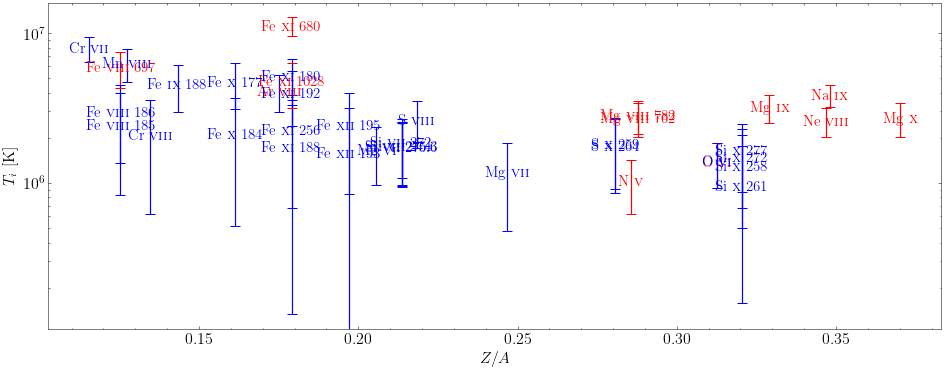

In [58]:
fig,ax = plt.subplots(figsize=(16,6))
ax.errorbar(line_z2a_all[:11],temp_aver_all[:11],[(temp_aver_all-temp_min_all)[:11],(temp_max_all-temp_aver_all)[:11]],
            marker=None,fmt="none",capsize=5,lw=1.2,color = 'red')
ax.errorbar(line_z2a_all[11:],temp_aver_all[11:],[(temp_aver_all-temp_min_all)[11:],(temp_max_all-temp_aver_all)[11:]],
            marker=None,fmt="none",capsize=5,lw=1.2,color = 'blue')
ax.set_yscale("log")
for ii in range(12):
    ax.text(line_z2a_all[ii],temp_aver_all[ii],line_id_latex_all[ii],ha = 'center',va = 'center',
            color = 'red',fontsize = 15,linespacing=1.5)
for ii in range(12,len(line_z2a_all)):
    ax.text(line_z2a_all[ii],temp_aver_all[ii],line_id_latex_all[ii],ha = 'center',va = 'center',
            color = 'blue',fontsize = 15,linespacing=1.5)
#ax.set_ylim(3e5,1e7)
#ax.set_xticks(np.arange(10))
#ax.set_xticklabels(line_id_latex)
ax.tick_params(labelsize=16)
ax.set_xlabel(r"$Z/A$",fontsize=16)
ax.set_ylabel(r"$T_i$ [K]",fontsize=16)
#ax.xaxis.set_major_locator(plt.MaxNLocator(13))